In [57]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import tensorflow as tf
import seaborn as sns
from keras.models import Model
from keras.layers import Flatten
import matplotlib.image as mpimg
import os
import cv2 as cv
import random
import splitfolders
from tensorflow.keras.optimizers import Adam

In [39]:
positives= os.listdir(r'C:\Users\hritv\Desktop\archive\Positive')
negatives= os.listdir(r'C:\Users\hritv\Desktop\archive\Negative')

In [40]:
# input_folder_path= r'C:\Users\hritv\Desktop\archive'
# splitfolders.ratio(input_folder_path,seed=42,ratio=(.7, .1, .2))

In [41]:
def dataset(dataset,img_size):  
    #df= pd.DataFrame()
    img_size= img_size
    lt=[]
    labels = ['Negative', 'Positive']
    path= os.path.join(r'C:\Users\hritv\Desktop\archive\output',dataset)
    for category in labels:
        path= os.path.join(path,category)
        for img in os.listdir(path):
            mod_img = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
            resized_img= cv.resize(mod_img, (img_size, img_size))
            lt.append([resized_img.flatten(),labels.index(category)])
        data= np.array(lt)
        path= os.path.join(r'C:\Users\hritv\Desktop\archive\output',dataset)
    return data

In [42]:
train_set= dataset('train',120)
val_set= dataset('val',120)
test_set= dataset('test',120)

C:\Users\hritv\AppData\Local\Temp\ipykernel_17152\1268048602.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data= np.array(lt)


In [43]:
def feature_label_split(dataset,img_size):
    X = []
    y = []
    for feature, label in dataset:
        X.append(feature)
        y.append(label)
    X = np.array(X).reshape(-1, img_size, img_size, 1)
    X = X / 255
    y = np.array(y)
    return X,y

In [44]:
# train_set.columns= ['Image','label']
# test_set.columns= ['Image','label']
# val_set.columns= ['Image','label']

In [45]:
x_train= feature_label_split(train_set,120)[0]
y_train= feature_label_split(train_set,120)[1]
x_valid= feature_label_split(val_set,120)[0]
y_valid= feature_label_split(val_set,120)[1]
x_test= feature_label_split(test_set,120)[0]
y_test= feature_label_split(test_set,120)[1]

In [9]:
x_train.shape

(28000, 120, 120, 1)

# CNN model

In [46]:
model1 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model1.add(tf.keras.layers.Conv2D(32,3, padding='same', activation='relu', input_shape= x_train.shape[1:])) 
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(64,3, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(128,3, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(512, activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [47]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 128)     

In [48]:
model1.compile(loss='binary_crossentropy',
             optimizer= Adam(learning_rate=1e-5),
             metrics=['accuracy'])

# checkpointer = ModelCheckpoint(filepath='basemodel.weights.best.hdf5', verbose = 3, save_best_only=True)

history1 = model1.fit(x_train,
         y_train,
         batch_size=128,
         epochs=10,
         validation_data=(x_valid, y_valid),
         verbose=1)

Epoch 1/10
219/219 [==============================] - 179s 813ms/step - loss: 0.5268 - accuracy: 0.8283 - val_loss: 0.3057 - val_accuracy: 0.9230
Epoch 2/10
219/219 [==============================] - 172s 786ms/step - loss: 0.2065 - accuracy: 0.9410 - val_loss: 0.1430 - val_accuracy: 0.9588
Epoch 3/10
219/219 [==============================] - 175s 798ms/step - loss: 0.1205 - accuracy: 0.9622 - val_loss: 0.1029 - val_accuracy: 0.9665
Epoch 4/10
219/219 [==============================] - 173s 788ms/step - loss: 0.0927 - accuracy: 0.9695 - val_loss: 0.0850 - val_accuracy: 0.9712
Epoch 5/10
219/219 [==============================] - 170s 777ms/step - loss: 0.0776 - accuracy: 0.9747 - val_loss: 0.0729 - val_accuracy: 0.9765
Epoch 6/10
219/219 [==============================] - 169s 772ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 7/10
219/219 [==============================] - 169s 771ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.0624 -

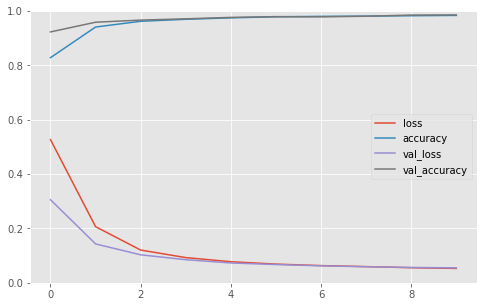

In [50]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

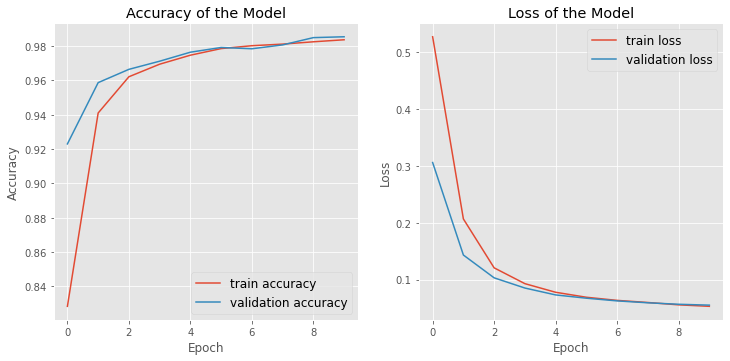

In [51]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})
plt.show()

In [52]:
prediction = model1.predict(x_test)

250/250 [==============================] - 11s 42ms/step


In [54]:
for i in range(len(prediction)):
    if prediction[i]>0.5:
        prediction[i]= 1
    else:
        prediction[i]= 0

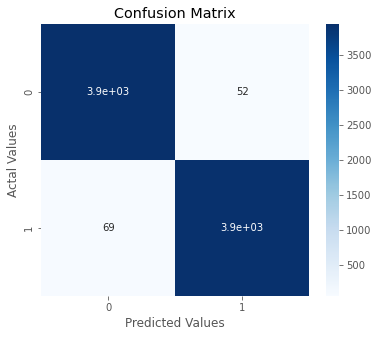

In [58]:
cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()